In [1]:
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("/Users/Shared/DATA/DataAnalysis_Agent/DA_Agent")
from src.models.llms import load_llm

MODEL_NAME = "gemini-2.0-flash"
llm = load_llm(model_name=MODEL_NAME)
llm

2025-05-18 16:16:56.625 | INFO     | src.config:<module>:11 - PROJ_ROOT path is: /Users/Shared/DATA/DataAnalysis_Agent/DA_Agent


ChatGoogleGenerativeAI(model='models/gemini-2.0-flash', google_api_key=SecretStr('**********'), temperature=0.0, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x124b1c440>, default_metadata=(), model_kwargs={})

In [3]:
llm.invoke("Hello, who r u??")

AIMessage(content='I am a large language model, trained by Google.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--2a18c19e-5147-486e-b715-12874bc0e90a-0')

In [35]:
df = pd.read_csv("../data/raw/delay_7_9_CONDITION_PRODUCT_SUPPLIER.csv")
da_agent = create_pandas_dataframe_agent(
        llm=llm, 
        df=df,
        agent_type="zero-shot-react-description",        allow_dangerous_code=True,
        verbose=True,
        return_intermediate_steps=True)
da_agent

AgentExecutor(verbose=True, agent=RunnableAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: format_log_to_str(x['intermediate_steps']))
})
| PromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={}, partial_variables={'df_head': '|    | Order date   | SUBSIDIARY_CD   |      GLOBAL_NO |   CLASSIFY_CD |   CUST_CD | BRAND_CD   | INNER_CD    |   SUPPLIER_CD |   Sales order line number |   Stock class |   Consider count hodiday Saturday |   SO QTY |   OTHER AREA SHIP DIV |   ALLOCATION QTY |   SUPPLIER INV AMOUNT | PACKING RANK   | PRODUCT_CD       |   PRODUCT ATTRIBUTION |   SPECIAL DIV |   LOGICAL PLANT |   PURCHASE AMOUNT | VSD        |   DIRECT SHIP FLG |   DELI_DIV |   label | Ship Mode   |   SHIP DECISION NO |   PACK QTY |   WEIGHT PER PIECE |   SUPPLIER_DIV |   SPECIAL_DIV |   SO_DAY_OF_MONTH |   SO_DAY_OF_WEEK |   REASON_CD |   SOUF_RCV_NO |   QTUF_RCV_NO |   SO_TIME |\n|---:|:-------------|:----------------|---------------:|----



> Entering new AgentExecutor chain...


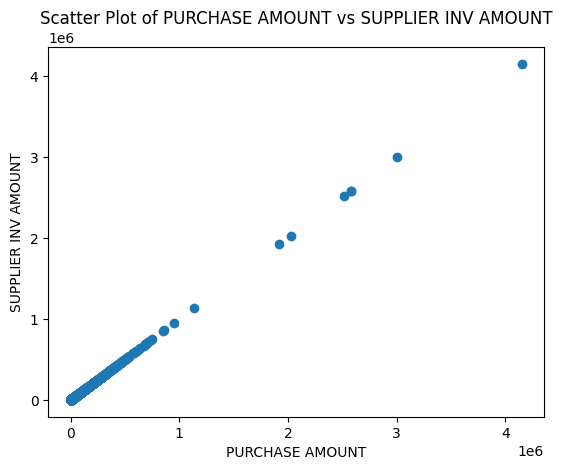

Thought: I need to use the python_repl_ast tool to plot a scatter plot of 'PURCHASE AMOUNT' and 'SUPPLIER INV AMOUNT' from the dataframe `df`. I will use matplotlib.pyplot for this.

Action: python_repl_ast
Action Input:
```python
import matplotlib.pyplot as plt

plt.scatter(df['PURCHASE AMOUNT'], df['SUPPLIER INV AMOUNT'])
plt.xlabel('PURCHASE AMOUNT')
plt.ylabel('SUPPLIER INV AMOUNT')
plt.title('Scatter Plot of PURCHASE AMOUNT vs SUPPLIER INV AMOUNT')
plt.show()
```Final Answer: The scatter plot of PURCHASE AMOUNT vs SUPPLIER INV AMOUNT has been generated and displayed.


> Finished chain.


In [36]:
# Ví dụ 1: Vẽ biểu đồ phân tán giữa SO QTY và PURCHASE AMOUNT
query = 'Create a scatter plot of SO QTY vs PURCHASE AMOUNT'

# Hoặc Ví dụ 2: Vẽ biểu đồ phân tán giữa SO QTY và SUPPLIER INV AMOUNT
query = 'Plot scatter plot of PURCHASE AMOUNT & SUPPLIER INV AMOUNT'

response = da_agent.invoke(query)

In [43]:
# Lấy query từ intermediate_steps
query = response['intermediate_steps'][0][0].tool_input

# Xử lý chuỗi để loại bỏ các ký tự đánh dấu code block
query = query.replace('```python\n', '').replace('```', '')

query

"import matplotlib.pyplot as plt\n\nplt.scatter(df['PURCHASE AMOUNT'], df['SUPPLIER INV AMOUNT'])\nplt.xlabel('PURCHASE AMOUNT')\nplt.ylabel('SUPPLIER INV AMOUNT')\nplt.title('Scatter Plot of PURCHASE AMOUNT vs SUPPLIER INV AMOUNT')\nplt.show()\n"